In [16]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from tensorflow.keras.optimizers import Adam

In [17]:


class_name=['Black Sea Sprat','Gilt-Head Bream','Hourse Mackerel','Red Mullet','Red Sea Bream','Sea Bass','Shrimp','Striped Red Mullet','Trout']

In [18]:
lst_dir=[]
lst_im=[]
for j in class_name:
    class_name1=f"{j}"
    lst_dir=os.listdir('C:\\Users\\pllab\\Desktop\\archives\\Fish_Dataset\\Fish_Dataset\\tt\\'+class_name1)
    for i in lst_dir:
        b=cv2.imread('C:\\Users\\pllab\\Desktop\\archives\\Fish_Dataset\\Fish_Dataset\\tt\\'+f'{class_name1}'+'\\'+i)
        b=cv2.resize(b,(200,200))
        lst_im.append(np.array(b))

In [19]:

lst_dir[9]


'00010.png'

In [20]:
lst_label=[]
for i in range(9000):
    if i<1000:
        lst_label.append([1,0,0,0,0,0,0,0,0])
    elif i<2000:
        lst_label.append([0,1,0,0,0,0,0,0,0])
    elif i<3000:
        lst_label.append([0,0,1,0,0,0,0,0,0])
    elif i<4000:
        lst_label.append([0,0,0,1,0,0,0,0,0])
    elif i<5000:
        lst_label.append([0,0,0,0,1,0,0,0,0])
    elif i<6000:
        lst_label.append([0,0,0,0,0,1,0,0,0])
    elif i<7000:
        lst_label.append([0,0,0,0,0,0,1,0,0])
    elif i<8000:
        lst_label.append([0,0,0,0,0,0,0,1,0])
    elif i<9000:
        lst_label.append([0,0,0,0,0,0,0,0,1])

In [21]:

lst_im=np.array(lst_im)
lst_label=np.array(lst_label)

In [22]:
lst_im[0].shape

(200, 200, 3)

In [23]:
lst_im.shape

(9000, 200, 200, 3)

In [24]:

lst_im,x_test,lst_label,y_test=train_test_split(lst_im,lst_label,test_size=0.3,random_state=42)
lst_im,x_val,lst_label,y_val=train_test_split(lst_im,lst_label,test_size=0.3,random_state=42)

In [25]:
x_val=np.array(x_val)
y_val=np.array(y_val)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [26]:
x_val.shape

(1890, 200, 200, 3)

In [27]:
lst_label.shape

(4410, 9)

In [28]:
y_val.shape

(1890, 9)

In [29]:
x_test.shape

(2700, 200, 200, 3)

In [30]:
y_test.shape

(2700, 9)

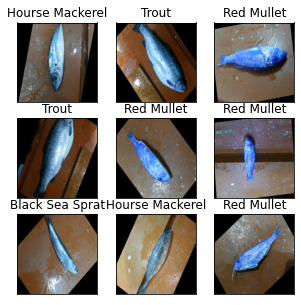

In [31]:
plt.figure(figsize=(5,5))
for i in range(9):
    b=np.argmax(lst_label[i])
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(lst_im[i])
    plt.title(f'{class_name[b]}')
plt.show()

In [32]:

x_val.shape

(1890, 200, 200, 3)

In [33]:
lst_im.shape

(4410, 200, 200, 3)

In [34]:
len(lst_label)

4410

In [35]:
lst_label.shape

(4410, 9)

In [36]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=3,padding='same',
                    activation='relu',input_shape=(200,200,3)))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',
                    activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',
                    activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',
                    activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',
                    activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',
                  activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(9,activation='softmax'))



In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 128)       7

In [38]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['acc'])



In [39]:
history=model.fit(lst_im,lst_label,
                     epochs=10,
                     batch_size=32,

                     validation_data=(x_val,y_val))
    

Epoch 1/10
138/138 [==============================] - 40s 263ms/step - loss: 13.8895 - acc: 0.2335 - val_loss: 0.9992 - val_acc: 0.6471
Epoch 2/10
138/138 [==============================] - 33s 239ms/step - loss: 0.7635 - acc: 0.7307 - val_loss: 0.3678 - val_acc: 0.8693
Epoch 3/10
138/138 [==============================] - 33s 239ms/step - loss: 0.2151 - acc: 0.9275 - val_loss: 0.2547 - val_acc: 0.9095
Epoch 4/10
138/138 [==============================] - 33s 240ms/step - loss: 0.0987 - acc: 0.9700 - val_loss: 0.2105 - val_acc: 0.9302
Epoch 5/10
138/138 [==============================] - 33s 240ms/step - loss: 0.0673 - acc: 0.9779 - val_loss: 0.2491 - val_acc: 0.9291
Epoch 6/10
138/138 [==============================] - 33s 240ms/step - loss: 0.0194 - acc: 0.9942 - val_loss: 0.2504 - val_acc: 0.9339
Epoch 7/10
138/138 [==============================] - 33s 240ms/step - loss: 0.0360 - acc: 0.9906 - val_loss: 0.2802 - val_acc: 0.9238
Epoch 8/10
138/138 [==============================] - 

In [40]:
predic=model.predict(x_test)

In [41]:
predic[0]

array([4.2630583e-07, 3.6849636e-07, 1.2347908e-09, 8.0982755e-11,
       6.6753563e-09, 3.2846397e-09, 5.1275364e-08, 9.9999917e-01,
       4.4641391e-10], dtype=float32)

In [42]:
np.random.seed(1)

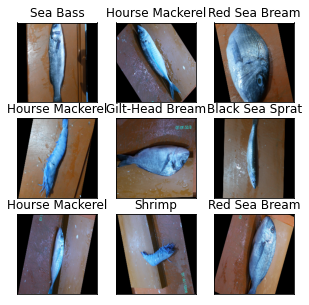

In [43]:

randidx=np.random.randint(2700,size=9)
plt.figure(figsize=(5,5))
for i,idx in enumerate(randidx):
    b=np.argmax(predic[idx])
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[idx])
    plt.title(f'{class_name[b]}')
plt.show()